In [36]:
import pandas as pd
import numpy as np
from scipy.stats import skew, kurtosis
import plotly.express as px

In [6]:
ruta=r"../data/Vtas_FA.xls"
data=pd.read_excel(ruta, sheet_name=0)
data[['Zona', 'Plaza']] = data[['Zona', 'Plaza']].ffill()

# Eliminar la última fila
data = data.drop(data.index[-1])

In [11]:
data.iloc[295:298,:]

,Zona,Plaza,Filial,Clave,Unidades,Ventas Con IVA,Ventas Sin IVA,Costo de Venta,Utilidad,% Utilidad
295,PUEBLA SUR,PUEBLA SUR,PEMA MARGARITA,PEMA,183158,9267770.11,8953266.47,7534104.36,1419162.12,0.1585
296,PUEBLA SUR,PUEBLA SUR,PEMJ MAJESTIC,PEMJ,0,0.00,0.00,0.00,0.00,0.0000
297,PUEBLA SUR,PUEBLA SUR,PEMN SAN MANUEL,PEMN,182733,10126002.01,9842817.36,8248686.57,1594130.79,0.1620


In [13]:
# Creamos una lista con los nombres de las columnas de valores numéricos
data_num_cols = ["Unidades", "Ventas Con IVA", "Ventas Sin IVA", "Costo de Venta", "Utilidad", "% Utilidad"]

In [23]:
# Obtenemos la media y mediana de cada columna
data[data_num_cols].agg(["mean", "median"])

,Unidades,Ventas Con IVA,Ventas Sin IVA,Costo de Venta,Utilidad,% Utilidad
mean,124886.982394,6.838080e+06,6.643674e+06,5.612538e+06,1.031136e+06,0.150831
median,122529.000000,6.593143e+06,6.373017e+06,5.376874e+06,9.514669e+05,0.155200


In [26]:
# Obetenemos la media por zona
data.groupby("Zona")[data_num_cols].mean()

,Unidades,Ventas Con IVA,Ventas Sin IVA,Costo de Venta,Utilidad,% Utilidad
Zona,,,,,,
ACAPULCO,142348.384615,6.652766e+06,6.451700e+06,5.364916e+06,1.086784e+06,0.166685
AGUASCALIENTES,79821.347826,4.919720e+06,4.828036e+06,4.288288e+06,5.397485e+05,0.106065
CUERNAVACA,133365.511111,6.666656e+06,6.457253e+06,5.342408e+06,1.114845e+06,0.172822
MEXICO NORTE,142046.500000,8.852898e+06,8.662254e+06,7.284002e+06,1.378252e+06,0.163791
MEXICO SUR,144031.312500,9.562115e+06,9.360728e+06,7.924529e+06,1.436199e+06,0.152787
MONTERREY,50890.529412,3.631933e+06,3.583248e+06,3.275322e+06,3.079265e+05,0.083518
MORELIA,87926.875000,4.824111e+06,4.707080e+06,4.020730e+06,6.863490e+05,0.141878
OAXACA,155785.655172,8.290773e+06,7.984034e+06,6.719100e+06,1.264934e+06,0.155300
PACHUCA,110376.181818,7.518422e+06,7.391011e+06,6.115747e+06,1.275264e+06,0.161873


In [27]:
# Obetenemos la mediana por zona
data.groupby("Zona")[data_num_cols].median()

,Unidades,Ventas Con IVA,Ventas Sin IVA,Costo de Venta,Utilidad,% Utilidad
Zona,,,,,,
ACAPULCO,136231.0,6727503.220,6549096.520,5384011.540,1075738.700,0.16830
AGUASCALIENTES,71804.0,4418841.490,4323860.480,3819982.260,496402.330,0.10580
CUERNAVACA,126561.0,6395503.950,6173951.790,5097388.720,999390.320,0.17560
MEXICO NORTE,128755.5,7868917.095,7620076.555,6507906.285,1191707.945,0.15925
MEXICO SUR,161457.0,8944352.850,8727898.875,7385323.085,1416437.705,0.15230
MONTERREY,51087.5,3665663.340,3588107.785,3219583.875,327898.495,0.08455
MORELIA,97613.5,5156909.965,5044102.380,4357092.395,742653.105,0.14255
OAXACA,153157.0,8975364.310,8570654.550,7207835.990,1361090.320,0.15310
PACHUCA,97412.0,7678182.800,7595205.440,5615910.850,986477.400,0.14220


In [28]:
# Obtenemos la desviacion estandar, coeficiente de asimetria y curtosis de cada columna
data[data_num_cols].agg(["std", "skew", "kurtosis"])

,Unidades,Ventas Con IVA,Ventas Sin IVA,Costo de Venta,Utilidad,% Utilidad
std,76716.433664,4.272188e+06,4.152114e+06,3.481864e+06,697412.709676,0.029173
skew,0.973090,9.407980e-01,9.553342e-01,9.389666e-01,1.112895,-0.204047
kurtosis,2.536888,1.476714e+00,1.503611e+00,1.464871e+00,1.900764,5.958551


In [29]:
# Obetenemos la desviación estandar por zona
data.groupby("Zona")[data_num_cols].std()

,Unidades,Ventas Con IVA,Ventas Sin IVA,Costo de Venta,Utilidad,% Utilidad
Zona,,,,,,
ACAPULCO,60001.853467,2.618345e+06,2.528795e+06,2.078411e+06,4.533319e+05,0.009582
AGUASCALIENTES,44787.072391,2.825293e+06,2.777464e+06,2.426044e+06,3.579809e+05,0.014339
CUERNAVACA,59217.887291,3.082230e+06,2.991792e+06,2.461266e+06,5.398661e+05,0.011893
MEXICO NORTE,61687.207625,3.783478e+06,3.719277e+06,3.154443e+06,5.890733e+05,0.037780
MEXICO SUR,73442.247385,5.552632e+06,5.450922e+06,4.615492e+06,8.434976e+05,0.009366
MONTERREY,39747.844133,3.040462e+06,3.004092e+06,2.756829e+06,2.514438e+05,0.015068
MORELIA,55970.096814,3.087133e+06,3.007626e+06,2.557032e+06,4.522593e+05,0.010538
OAXACA,85657.919960,4.646229e+06,4.459754e+06,3.698840e+06,7.706005e+05,0.009829
PACHUCA,58342.533465,4.015481e+06,3.971886e+06,3.171385e+06,1.019854e+06,0.055802


In [30]:
# Obetenemos el coeficiente de asimetria por zona
data.groupby("Zona")[data_num_cols].skew()

,Unidades,Ventas Con IVA,Ventas Sin IVA,Costo de Venta,Utilidad,% Utilidad
Zona,,,,,,
ACAPULCO,0.065167,0.312497,0.326883,0.315878,0.362332,-0.180881
AGUASCALIENTES,0.265977,0.634142,0.659080,0.586395,1.257263,-0.386555
CUERNAVACA,0.454003,0.763587,0.794414,0.728415,1.089455,-2.656362
MEXICO NORTE,0.315061,0.924682,0.946899,0.821388,1.331275,3.885443
MEXICO SUR,-0.304424,0.294672,0.308287,0.315351,0.338039,-0.145891
MONTERREY,0.725628,1.176481,1.185113,1.215574,0.866725,0.065801
MORELIA,0.451612,0.216897,0.217884,0.198818,0.346224,-1.129347
OAXACA,0.191792,0.512864,0.540058,0.453922,1.054526,1.450483
PACHUCA,0.225927,0.046381,0.080358,-0.086269,1.747818,1.580592


In [31]:
# Obetenemos la curtosis por zona

# Definir una función para calcular la curtosis
def calcular_curtosis(x):
    return kurtosis(x, nan_policy='omit')  # 'omit' para manejar NaN

data.groupby("Zona")[data_num_cols].agg(calcular_curtosis)

,Unidades,Ventas Con IVA,Ventas Sin IVA,Costo de Venta,Utilidad,% Utilidad
Zona,,,,,,
ACAPULCO,-0.407718,0.319107,0.355906,0.363043,0.264924,-0.411930
AGUASCALIENTES,-0.694001,0.227180,0.294726,0.107808,2.008939,0.537118
CUERNAVACA,0.173362,1.097005,1.186362,1.021376,1.792606,7.654014
MEXICO NORTE,1.772755,1.794317,1.784156,1.617292,2.478952,13.379636
MEXICO SUR,-0.871701,-0.519250,-0.513931,-0.489028,-0.470053,3.020776
MONTERREY,-0.021065,1.416033,1.438940,1.525013,0.524621,-0.890009
MORELIA,0.500851,-0.615341,-0.617448,-0.671799,-0.251127,1.423729
OAXACA,-0.788216,0.219816,0.278124,0.034525,1.911588,3.280511
PACHUCA,-1.008482,-0.927961,-0.906766,-1.099869,1.882561,0.330369


In [33]:
# Calculamos los percentiles de cada columna
data[data_num_cols].quantile([i/100 for i in range(1, 100)]).head(10)

,Unidades,Ventas Con IVA,Ventas Sin IVA,Costo de Venta,Utilidad,% Utilidad
0.01,3349.71,2.292833e+05,2.276148e+05,2.107631e+05,20042.6488,0.065569
0.02,6619.02,4.520285e+05,4.491187e+05,4.069647e+05,48251.0792,0.074118
0.03,9864.70,6.464627e+05,6.117691e+05,5.062942e+05,55720.1792,0.078936
0.04,13338.96,8.186708e+05,8.122087e+05,7.005286e+05,101229.9560,0.089704
0.05,17264.00,9.248166e+05,9.071479e+05,8.424742e+05,129394.1010,0.091240
0.06,21507.52,1.261680e+06,1.240886e+06,1.059676e+06,145436.4038,0.100202
0.07,22979.45,1.374952e+06,1.363848e+06,1.169052e+06,175187.4578,0.102907
0.08,24270.16,1.482880e+06,1.461133e+06,1.241389e+06,190308.1472,0.105416
0.09,26981.71,1.528861e+06,1.510737e+06,1.280861e+06,204356.0388,0.108709
0.10,28047.50,1.560280e+06,1.532125e+06,1.322749e+06,228288.5020,0.111540


In [34]:
# Calculamos los deciles de cada columna
data[data_num_cols].quantile([i/10 for i in range(1, 10)])

,Unidades,Ventas Con IVA,Ventas Sin IVA,Costo de Venta,Utilidad,% Utilidad
0.1,28047.5,1.560280e+06,1.532125e+06,1.322749e+06,228288.502,0.11154
0.2,55724.6,2.965454e+06,2.895952e+06,2.464880e+06,382616.434,0.14090
0.3,80112.1,4.410168e+06,4.300809e+06,3.730975e+06,589927.692,0.14841
0.4,105530.0,5.578415e+06,5.431382e+06,4.616831e+06,834400.670,0.15200
0.5,122529.0,6.593143e+06,6.373017e+06,5.376874e+06,951466.855,0.15520
0.6,138217.4,7.515369e+06,7.310142e+06,6.178659e+06,1094029.396,0.15750
0.7,158554.6,8.394172e+06,8.132100e+06,6.903711e+06,1244285.914,0.16049
0.8,182786.0,9.790404e+06,9.504612e+06,7.997231e+06,1511230.898,0.16676
0.9,213886.7,1.228224e+07,1.197759e+07,1.001697e+07,1932200.974,0.17543


In [35]:
# Calculamos los cuartiles de cada columna
data[data_num_cols].quantile([0.25, 0.50, 0.75])

,Unidades,Ventas Con IVA,Ventas Sin IVA,Costo de Venta,Utilidad,% Utilidad
0.25,67183.25,3.662714e+06,3.600843e+06,3121903.665,507272.280,0.145225
0.50,122529.00,6.593143e+06,6.373017e+06,5376874.070,951466.855,0.155200
0.75,169206.00,8.863166e+06,8.593943e+06,7267807.150,1380535.705,0.162650


In [38]:
# Definimos una lista de colores para las graficas
colors = ['skyblue', 'lightgreen', 'lightcoral', 'goldenrod', 'tomato', 'mediumvioletred']

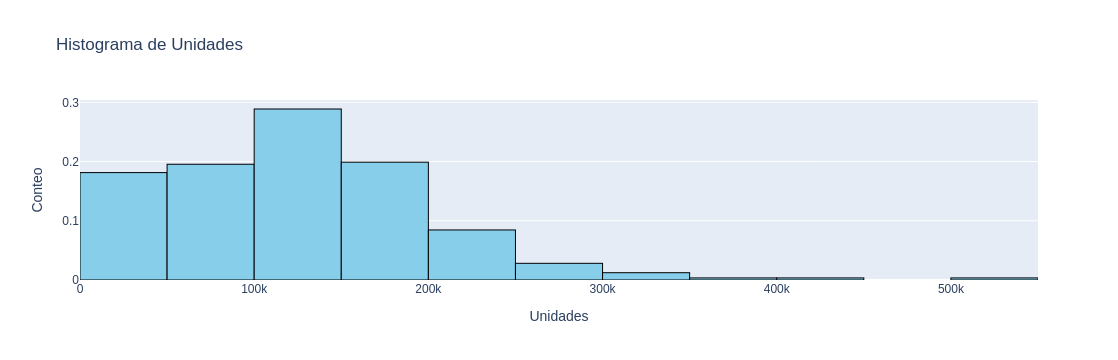

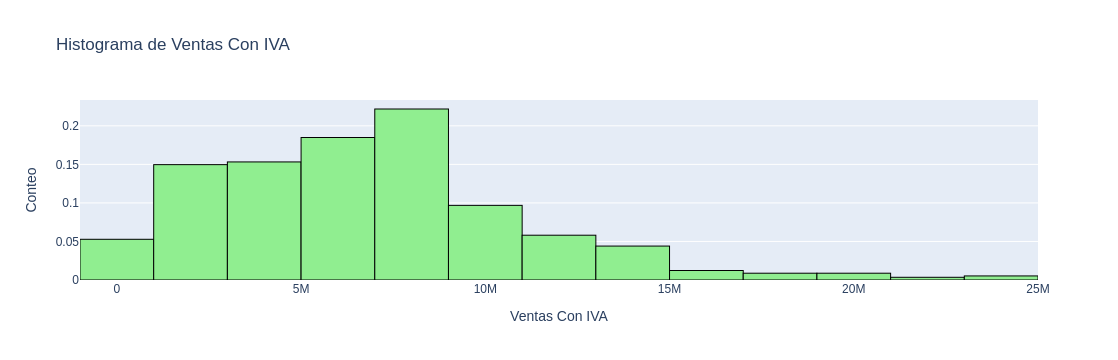

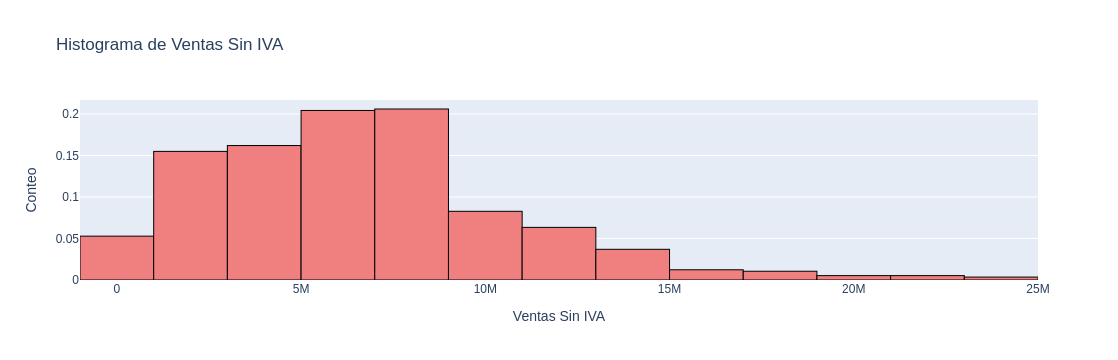

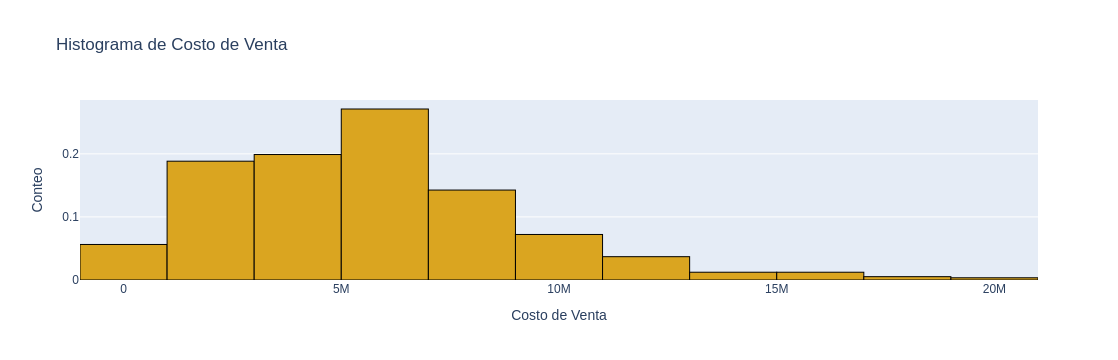

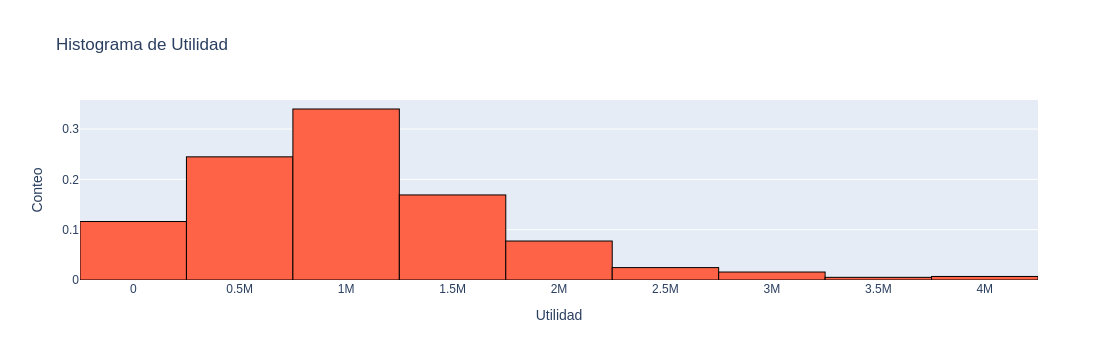

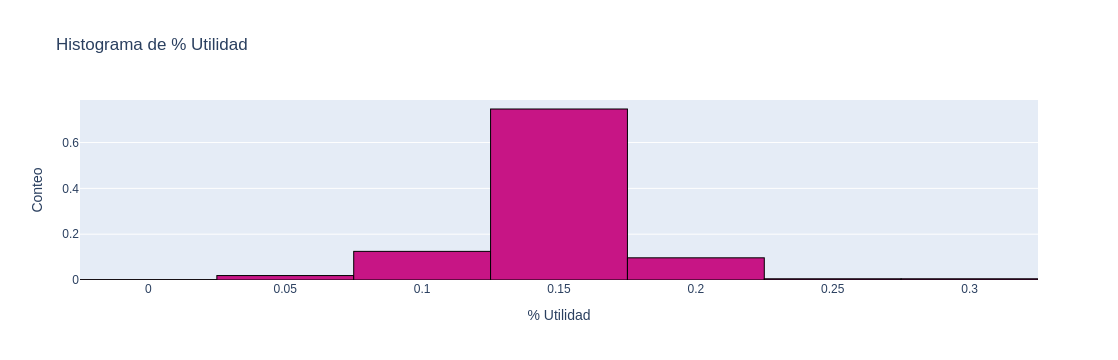

In [40]:
# Creamos los histogramas

# Iterar sobre la lista de columnas numéricas
for col, color in zip(data_num_cols, colors):
    # Crear el histograma
    fig = px.histogram(data, x=col, nbins=15, title=f"Histograma de {col}",
                       color_discrete_sequence=[color],histnorm='probability')

    # Actualizar el diseño para agregar un contorno negro a las barras
    fig.update_traces(marker=dict(line=dict(color='black', width=1)))

    # Actualizar la etiqueta del eje y
    fig.update_layout(yaxis_title='Conteo')

    # Mostrar el histograma
    fig.show()

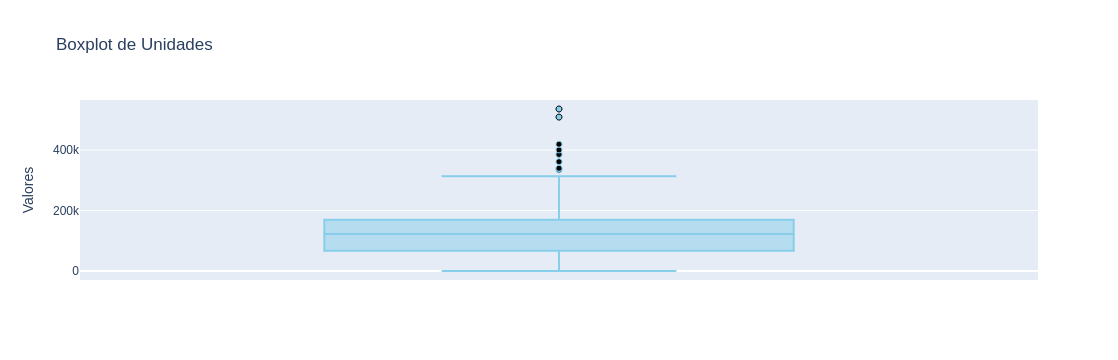

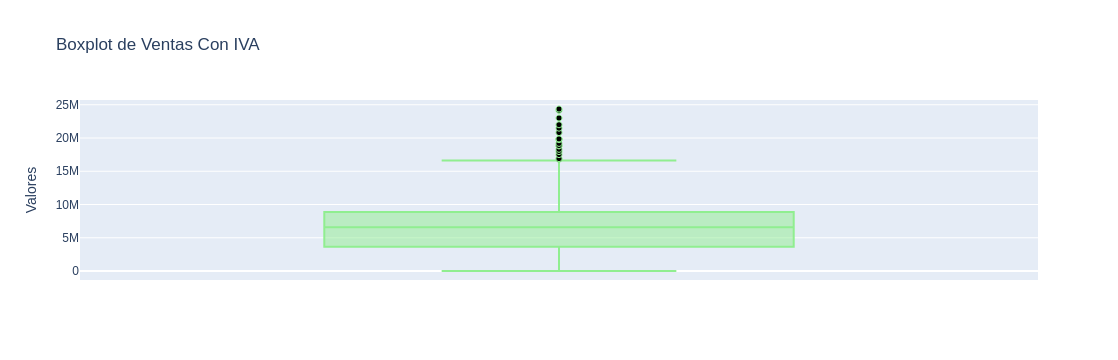

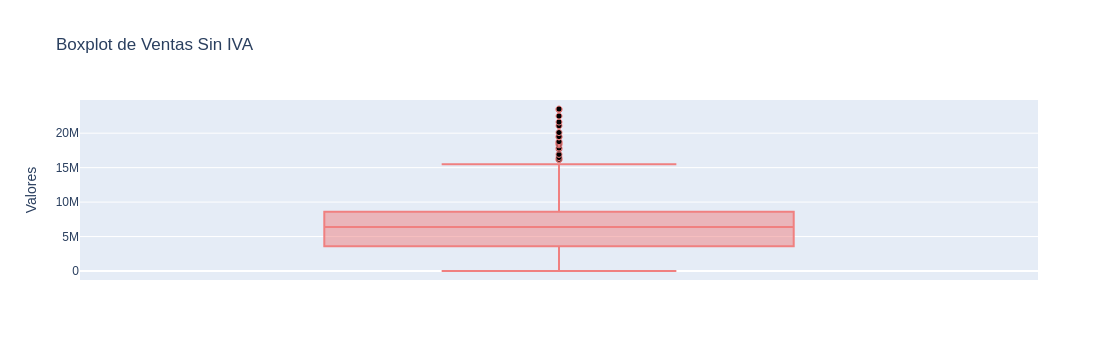

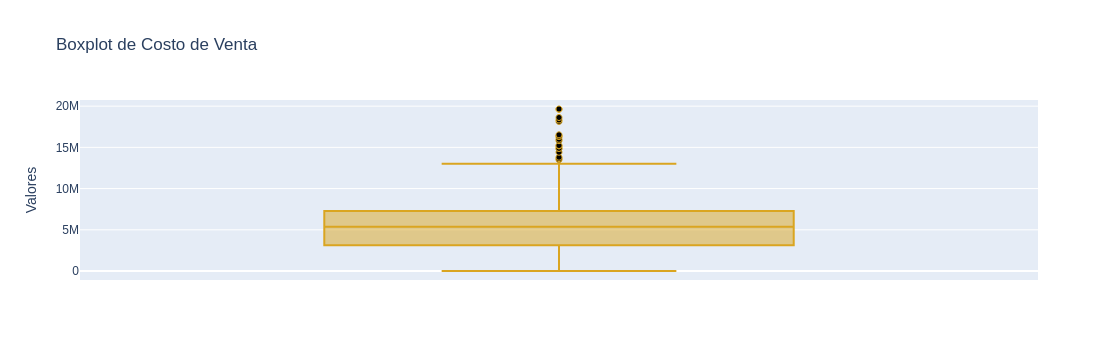

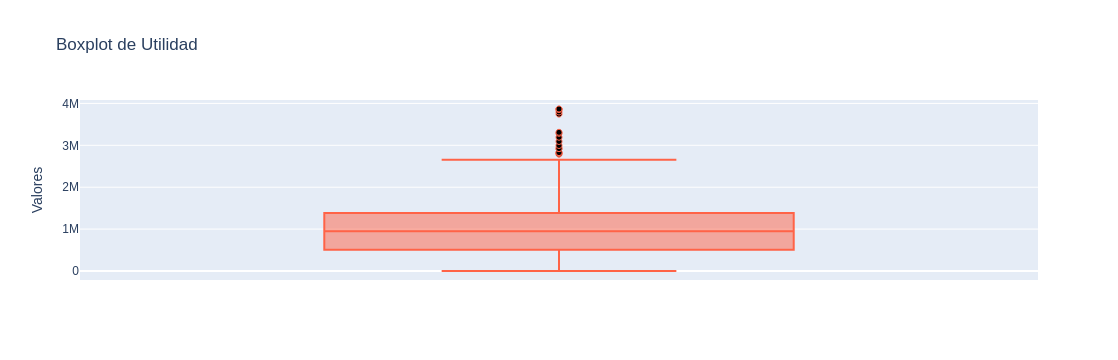

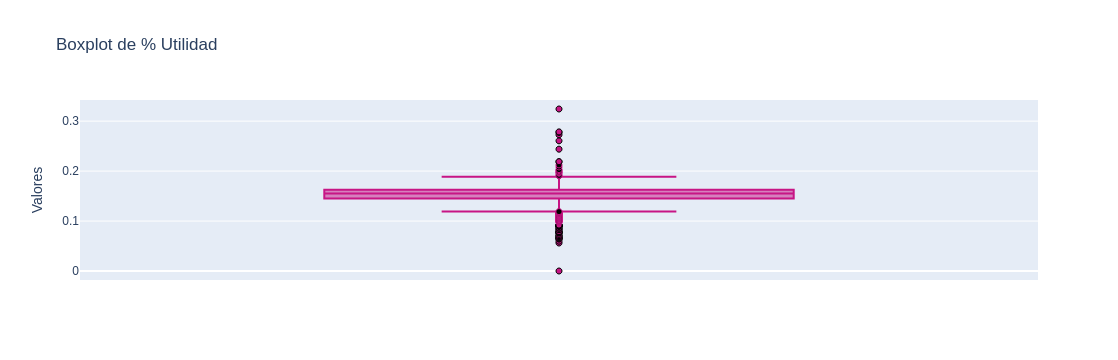

In [43]:
# Creamos los boxplots

# Iterar sobre la lista de columnas numéricas
for col, color in zip(data_num_cols, colors):
    # Crear el boxplot
    fig = px.box(data, y=col, title=f"Boxplot de {col}",
                 color_discrete_sequence=[color])

    # Actualizar el diseño para agregar un contorno negro a las cajas y personalizar los puntos atípicos
    fig.update_traces(
        marker=dict(color=color, outliercolor='black', line=dict(color='black', width=1))
    )

    # Actualizar la etiqueta del eje y
    fig.update_layout(yaxis_title='Valores')

    # Mostrar el boxplot
    fig.show()